<hr>

**<h1><b> CS437/CS5317/EE414/EE513 Deep Learning | <span style="color: #9370DB;"> PA2</span></b></h1>**

<hr>

## <span style="color: #9370DB;">**Submission Guidelines**</span>

- <span style="color: #9370DB;">Please rename the file to `<RollNumber>_PA2_2`.</span>
- <span style="color: #9370DB;">Please also submit a **.py** file of every Notebook. You can do this by exporting your **ipynb** to a Python script.</span>
- <span style="color: #9370DB;">Please submit a zipped folder of both your Jupyter Notebooks and Python script files.</span>

In [2]:
# ============ Import Libraries =============
import warnings
warnings.filterwarnings('ignore')
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from torchsummary import summary
import random
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score

# =========== Student Information ===========
Name = "Zaeem Yousaf"
Roll_Number = 23030021

# =========== Device Configuration ==========
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU is available or not
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu') # MPS is available or not - Only for Macbook M1 and above
print(f"Device: {device}")

# =========== Visualization Function ==========
def imshow(img, dataset_name):
    img = img
    npimg = img.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(f"Random Batch of Images from the {dataset_name} Dataset")
    plt.show()


Device: cpu


<hr>

## <h1><b> Part 2: Linear Autoencoders and Autoencoders Using CNN in PyTorch <span style="color: #9370DB;"> (75 Points Total)</span></b></h1>  

<hr>

### <h2><b> Introduction </b></h2>  
<p>Autoencoders are a type of <b>unsupervised neural network</b> designed to learn efficient data representations. They consist of two main components:</p>  
<ul>  
    <li><b>Encoder:</b> Compresses the input into a lower-dimensional latent space.</li>  
    <li><b>Decoder:</b> Reconstructs the original input from the encoded representation.</li>  
</ul>  

<p>This structure makes autoencoders useful for various tasks, including:</p>  
<ul>  
    <li>Dimensionality reduction</li>
    <li>Noise removal (denoising autoencoders)</li>  
    <li>Anomaly detection</li>  
    <li>Feature extraction for downstream tasks</li>  
</ul>

<hr>  

<h2><b> Linear and Convolutional Autoencoders </b></h2>  
<p>In this task, we explore two types of autoencoders:</p>  

<ul>
    <li><b>Linear Autoencoder:</b> Uses fully connected layers and learns a compressed representation of the input in a linear fashion, often simpler and less computationally intensive than convolutional variants.</li>
    <li><b>Convolutional Autoencoder (CAE):</b> Replaces fully connected layers with <b>convolutional layers</b>, making it more effective for image processing. CAEs leverage spatial hierarchies in images, capturing key features while preserving important structures.</li>    
</ul>

<hr>  

<h2><b> CIFAR-10 and MNIST Datasets </b></h2>  
<p>The <b>CIFAR-10 dataset</b> is a commonly used benchmark dataset for deep learning research. It consists of <b>60,000 color images</b> (32x32 pixels), divided into <b>10 classes</b> representing different objects:</p>  

<table border="1" cellpadding="10" cellspacing="0" style="border-collapse: collapse; text-align: center;">  
    <tr style="background-color:rgb(60, 60, 60);">  
        <th><b>Class</b></th>  
        <th>Airplane</th>  
        <th>Automobile</th>  
        <th>Bird</th>  
        <th>Cat</th>  
        <th>Deer</th>  
        <th>Dog</th>  
        <th>Frog</th>  
        <th>Horse</th>  
        <th>Ship</th>  
        <th>Truck</th>  
    </tr>  
    <tr>  
        <th style="background-color:rgb(60, 60, 60);"><b>Label</b></th>  
        <td>0</td>  
        <td>1</td>  
        <td>2</td>  
        <td>3</td>  
        <td>4</td>  
        <td>5</td>  
        <td>6</td>  
        <td>7</td>  
        <td>8</td>  
        <td>9</td>  
    </tr>  
</table>  

<p>The <b>MNIST dataset</b> contains <b>60,000 grayscale images</b> (28x28 pixels) of handwritten digits, divided into <b>10 classes</b> (digits 0-9), used primarily for digit classification and image reconstruction tasks.</p>  

<hr>

<h2><b> Objectives </b></h2>  

<ul>  
    <li>Implement an <b>Autoencoder</b> using two architectures: <b>Linear Autoencoder</b> and <b>Convolutional Autoencoder (CNN)</b>.</li>  
    <li>Design and implement <b>Encoder</b> and <b>Decoder</b> modules in PyTorch.</li>  
    <li>Train the models on <b>CIFAR-10</b> and <b>MNIST</b> datasets, evaluating their reconstruction quality.</li>  
    <li>Test the Autoencoders in <b>six scenarios</b>, each demonstrating a key application:</li>  
    <ul>
        <li>Linear Autoencoder - Reconstruction (CIFAR-10)</li>
        <li>Convolutional Autoencoder - Reconstruction (CIFAR-10)</li>
        <li>Linear Autoencoder - Denoising (MNIST)</li>
        <li>Convolutional Autoencoder - Denoising (MNIST)</li>
        <li>CNN Image Classification Analysis - CIFAR-10 Reconstruction</li>
        <li>CNN Image Classification Analysis - MNIST Denoising</li>
    </ul>
    <li>Extend the applications by implementing <b>Task 7: Generating Images using Latent Space</b> for advanced understanding and performance evaluation.</li>
</ul>  

<br>

<table border="1" cellpadding="10" cellspacing="0" width="100%">  
    <tr>  
        <th><b>Scenario</b></th>  
        <th><b>Description</b></th>  
        <th><b>Purpose</b></th>  
    </tr>  
    <tr>  
        <td><b>1. Linear Autoencoder - Reconstruction (CIFAR-10)</b></td>  
        <td>Train and test a linear autoencoder on the CIFAR-10 dataset for image reconstruction.</td>  
        <td>Demonstrates the ability of a linear autoencoder to learn compressed representations and reconstruct images from CIFAR-10.</td>  
    </tr>  
    <tr>  
        <td><b>2. Convolutional Autoencoder - Reconstruction (CIFAR-10)</b></td>  
        <td>Train and test a convolutional autoencoder on CIFAR-10 images for image reconstruction.</td>  
        <td>Shows how convolutional layers can capture spatial features and improve reconstruction performance on CIFAR-10.</td>  
    </tr>  
    <tr>  
        <td><b>3. Linear Autoencoder - Denoising (MNIST)</b></td>  
        <td>Train the model on noisy MNIST images and test its ability to reconstruct clean images.</td>  
        <td>Demonstrates how a linear autoencoder can filter noise and recover the original images from noisy inputs.</td>  
    </tr>  
    <tr>  
        <td><b>4. Convolutional Autoencoder - Denoising (MNIST)</b></td>  
        <td>Train the convolutional autoencoder on noisy MNIST digits and test its denoising capabilities.</td>  
        <td>Shows how convolutional autoencoders can better denoise images by leveraging spatial hierarchies in image data.</td>  
    </tr>
    <tr>  
        <td><b>5. CNN Image Classification Analysis - CIFAR-10 Reconstruction</b></td>  
        <td>Train a CNN on clean CIFAR-10 images and evaluate its performance on the original test data, LAERecon reconstructed test data, and CAERecon reconstructed test data.</td>  
        <td>Assesses how well the reconstructions preserve essential features for classification.</td>  
    </tr>  
    <tr>  
        <td><b>6. CNN Image Classification Analysis - MNIST Denoising</b></td>  
        <td>Train a CNN on clean MNIST images and evaluate its performance on the original test data, LAEDenoise reconstructed test data, and CAEDenoise reconstructed test data.</td>  
        <td>Assesses how well the denoising reconstructions preserve essential features for classification.</td>  
    </tr>  
    <tr>  
        <td><b>7. Generating Images using Latent Space</b></td>  
        <td>Sample random vectors from the latent space and pass them through the decoder to generate new images.</td>  
        <td>Evaluate the potential of autoencoders for generating realistic images from latent space representations.</td>  
    </tr>  
</table>  

<br>  

<p>This task will test the ability to build and apply Autoencoders in PyTorch, explore feature learning, and analyze their performance across different real-world applications.</p>

<hr>

<hr>

## <h1><b> Hyper<span style="color: #9370DB;">parameters</span></b></h1>  

<hr>

In [ ]:
BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 0.001

# =========== Results Dictionary (To be updated and printed at the end) ==========

Overall_Results = {
    "Task 1" : None,
    "Task 2" : None,
    "Task 3" : None,
    "Task 4" : None,
    "Task 5" : None,
    "Task 6" : None,
}

<hr>

## <h1><b> Dataset Loading |<span style="color: #9370DB;"> CIFAR-10</span></b></h1>  

<hr>

In [ ]:
# ============== Data Preprocessing ==================
transform = transforms.Compose([
    transforms.ToTensor()
])

# ================ Data Loading ======================
CIFAR_10_trainset = ...
CIFAR_10_trainloader = ...

CIFAR_10_testset = ...
CIFAR_10_testloader = ...

<hr>

## <h1><b> Dataset Loading |<span style="color: #9370DB;"> MINST</span></b></h1>  

<hr>

In [ ]:
# ============== Data Preprocessing ==================
transform = transforms.Compose([
    transforms.ToTensor()
])

transform_noisy = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.5 * torch.randn_like(x))
])

# ================ Data Loading ======================
MNIST_trainset = ...
MNIST_trainloader = ...

MNIST_testset = ...
MNIST_testloader = ...

MNIST_trainset_noisy = ...
MNIST_trainloader_noisy = ...

MNIST_testset_noisy = ...
MNIST_testloader_noisy = ...

<hr>

## <h1><b> Data Visualisation |<span style="color: #9370DB;"> CIFAR-10</span></b></h1>  

<hr>

In [ ]:
dataiter = iter(CIFAR_10_trainloader)
images, _ = next(dataiter)
imshow(torchvision.utils.make_grid(images[0:16]), "CIFAR-10")

<hr>

## <h1><b> Data Visualisation |<span style="color: #9370DB;"> MINST</span></b></h1>  

<hr>

In [ ]:
dataiter = iter(MNIST_trainloader)
images, _ = next(dataiter)
imshow(torchvision.utils.make_grid(images[0:16]), "MNIST")

<hr>

## <h1><b> Data Visualisation |<span style="color: #9370DB;"> MINST - Noisy</span></b></h1>  

<hr>

In [ ]:
dataiter = iter(MNIST_trainloader_noisy)
images, _ = next(dataiter)
imshow(torchvision.utils.make_grid(images[0:16]), "MNIST_NOISY")

<hr>

## <h1 style="text-align: left;"><b>Task 1: Linear Autoencoder Reconstruction | <span style="color: #9370DB;">CIFAR-10</span></b></h1>

<hr>

### <h2>1. In a Linear Autoencoder (LAE):</h2>

<ul>
    <li>The <b>encoder</b> primarily uses <code>Linear</code> layers to compress the input into a lower-dimensional latent space.</li>
    <li>The <b>decoder</b> utilizes <code>Linear</code> layers to reconstruct the original input from the latent space.</li>
</ul>

<hr>

<h2>2. Fully Connected Layers in a Linear Autoencoder</h2>

<table border="1" cellpadding="10" cellspacing="0" width="100%">
    <tr style="background-color:rgb(60, 60, 60);">
        <th style="text-align: left;">Layer</th>
        <th style="text-align: left;">Function</th>
    </tr>
    <tr>
        <td><b>Linear</b></td>
        <td>Applies a fully connected transformation to project the input into a lower-dimensional space (encoding) or reconstruct it back (decoding).</td>
    </tr>
</table>

<p>You can read the PyTorch documentation as well for more information!</p>

<hr>

<h2>3. Understanding Linear Layers</h2>

<h3>Linear Layer</h3>
<p>A <b>Linear Layer</b> applies a fully connected transformation, mapping an input vector to an output vector using weights and biases.</p>
<p><b>Syntax:</b></p>
<pre style="background-color:rgb(60, 60, 60); padding: 10px; border-radius: 5px;">
nn.Linear(in_features, out_features)
</pre>

<ul>
    <li><b>in_features:</b> Number of input features (e.g., flattened image pixels).</li>
    <li><b>out_features:</b> Number of output features (e.g., latent space dimension).</li>
</ul>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Linear Autoencoder</span></h1>

<hr>

In [3]:
import torch
import torch.nn as nn

class LinearAutoencoderRecon(nn.Module):
    def __init__(self):
        super(LinearAutoencoderRecon, self).__init__()
        # ===================== YOUR CODE HERE ======================
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),
            nn.ReLU(),
            nn.Linear(1024, 128),  # latent space
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3 * 32 * 32),
            nn.Sigmoid()  # to bring values back between 0 and 1
        )
        # ===========================================================

    def forward(self, x):
        # ===================== YOUR CODE HERE ======================
        x = x.view(x.size(0), -1)       # Flatten the image
        latent = self.encoder(x)        # Encode
        out = self.decoder(latent)      # Decode
        out = out.view(x.size(0), 3, 32, 32)  # Reshape to image
        return out
        # ===========================================================


<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">LAERecon</span></h1>

<hr>

### <p><strong>Overview:</strong><br>
The <code>LAERecon</code> is a class designed to facilitate the training, evaluation, and visualization of a <strong>Linear Autoencoder (LAE)</strong> model. It manages the training loop, computes losses, performs evaluations, and visualizes reconstructions to monitor model performance. The class also includes methods for saving and loading the model.</p>

---

<h3>Constructor (<code>__init__</code>):</h3>
<p>The constructor initializes key components:</p>
<ul>
  <li><code>model (nn.Module)</code>: The Linear Autoencoder model.</li>
  <li><code>train_loader (DataLoader)</code>: The training dataset loader.</li>
  <li><code>test_loader (DataLoader)</code>: The test dataset loader.</li>
  <li><code>lr (float)</code>: Learning rate for the optimizer (default <code>0.001</code>).</li>
  <li><code>num_epochs (int)</code>: Number of training epochs (default <code>20</code>).</li>
  <li><code>device (str or None)</code>: Device for computation (auto-detects if set to <code>None</code>).</li>
  <li><code>imshow_func (function or None)</code>: Optional function for visualizing reconstructions.</li>
</ul>

---

<h3>Methods:</h3>

<h4>1. Training (<code>train</code>)</h4>
<p><strong>Purpose:</strong> Trains the autoencoder over multiple epochs.</p>
<p><strong>Workflow:</strong> Iterates through training batches, performs a forward pass, computes loss, and updates weights using backpropagation. After each epoch, it evaluates the model and prints the training loss.</p>

<h4>2. Evaluation (<code>evaluate</code>)</h4>
<p><strong>Purpose:</strong> Evaluates the trained model's performance on the test dataset.</p>
<p><strong>Workflow:</strong> The model is set to evaluation mode, and test loss is calculated by comparing reconstructed outputs to the original images.</p>

<h4>3. Model Saving (<code>save_model</code>)</h4>
<p><strong>Purpose:</strong> Saves the trained model to a specified file path.</p>
<p><strong>Outputs:</strong> Prints a confirmation message upon saving.</p>

<h4>4. Model Loading (<code>load_model</code>)</h4>
<p><strong>Purpose:</strong> Loads a saved model from a specified file path.</p>
<p><strong>Outputs:</strong> Prints a confirmation message upon loading.</p>

<h4>5. Plotting Results (<code>plot_results</code>)</h4>
<p><strong>Purpose:</strong> Plots training and test losses over the epochs.</p>

<h4>6. Visualization of Reconstructions (<code>visualize_reconstructions</code>)</h4>
<p><strong>Purpose:</strong> Displays original and reconstructed images for model performance assessment.</p>

---

<h3>Example Usage:</h3>

```python
    # Instantiate the LAERecon class
    trainer = LAERecon(model, train_loader, test_loader, lr=0.001, num_epochs=20, device='cuda')

    # Start training
    trainer.train()

    # Plot training and test loss
    trainer.plot_results()

    # Visualize reconstructions
    trainer.visualize_reconstructions(num_images=5)
```

---

<h3>Summary:</h3>
<ul>
  <li>Handles training, evaluation, and visualization of a Linear Autoencoder.</li>
  <li>Supports model saving and loading.</li>
  <li>Provides loss tracking and reconstruction visualization.</li>
</ul>

<h3>Notes:</h3>
<ul>
  <li>Allows custom image visualization via <code>imshow_func</code>.</li>
  <li>Keeps track of loss trends for analysis.</li>
</ul>

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class LAERecon:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        self.name = "Linear Autoencoder (Reconstruction)"
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        self.imshow_func = imshow_func

        self.model.to(self.device)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []

    def train(self):
        for epoch in range(self.num_epochs):
            self.model.train()
            total_loss = 0

            for images, _ in self.train_loader:
                images = images.to(self.device)

                outputs = self.model(images)
                loss = self.criterion(outputs, images)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()

            avg_train_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_train_loss)

            test_loss = self.evaluate(epoch, train=False)
            self.test_losses.append(test_loss)

            print(f"Epoch [{epoch+1}/{self.num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}")

    def evaluate(self, epoch, train=True):
        self.model.eval()
        loader = self.train_loader if train else self.test_loader
        total_loss = 0

        with torch.no_grad():
            for images, _ in loader:
                images = images.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, images)
                total_loss += loss.item()

        return total_loss / len(loader)

    def plot_results(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.train_losses, label="Train Loss")
        plt.plot(self.test_losses, label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training vs Test Loss")
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_reconstructions(self, num_images=5):
        self.model.eval()
        with torch.no_grad():
            for images, _ in self.test_loader:
                images = images.to(self.device)
                outputs = self.model(images)
                break  # Only visualize the first batch

        images = images[:num_images].cpu()
        outputs = outputs[:num_images].cpu()

        fig, axs = plt.subplots(2, num_images, figsize=(15, 4))
        for i in range(num_images):
            axs[0, i].imshow(images[i].permute(1, 2, 0))
            axs[0, i].axis('off')
            axs[0, i].set_title("Original")

            axs[1, i].imshow(outputs[i].permute(1, 2, 0))
            axs[1, i].axis('off')
            axs[1, i].set_title("Reconstructed")

        plt.tight_layout()
        plt.show()

    def create_dataset(self):
        reconstructed_data = []
        labels = []

        self.model.eval()
        with torch.no_grad():
            for images, lbls in self.test_loader:
                images = images.to(self.device)
                outputs = self.model(images)
                reconstructed_data.append(outputs.cpu())
                labels.append(lbls)

        recon_data = torch.cat(reconstructed_data)
        recon_labels = torch.cat(labels)

        recon_dataset = torch.utils.data.TensorDataset(recon_data, recon_labels)
        return torch.utils.data.DataLoader(recon_dataset, batch_size=64, shuffle=False)


<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [10]:
# Imports
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Transform
transform = transforms.ToTensor()

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Model
class LinearAutoencoderRecon(nn.Module):
    def __init__(self):
        super(LinearAutoencoderRecon, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon.view(-1, 1, 28, 28)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.80MB/s]


In [11]:
# Initialize model
LAE_RECON_Model = LinearAutoencoderRecon().to(device)

# Trainer class assumed to be defined earlier as LAERecon
LAE_RECON_Trainer = LAERecon(
    model=LAE_RECON_Model,
    train_loader=train_loader,
    test_loader=test_loader,
    lr=0.001,
    num_epochs=20,
    device=device
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [12]:
def train(self):
    """
    Trains the Autoencoder for a specified number of epochs.
    """
    self.model.to(self.device)
    self.model.train()
    optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
    criterion = nn.MSELoss()

    self.train_losses = []
    self.test_losses = []

    for epoch in range(self.num_epochs):
        total_loss = 0
        for batch in self.train_loader:
            images, _ = batch
            images = images.to(self.device)

            optimizer.zero_grad()
            outputs = self.model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_train_loss = total_loss / len(self.train_loader)
        self.train_losses.append(avg_train_loss)

        test_loss = self.evaluate(epoch, train=False)
        self.test_losses.append(test_loss)

        print(f"Epoch [{epoch+1}/{self.num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}")


In [13]:
# 1. Define your model (LinearAutoencoderRecon class)
model = LinearAutoencoderRecon()

# 2. Assume train_loader and test_loader are already defined DataLoaders

# 3. Create the trainer
trainer = LAERecon(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    lr=0.001,
    num_epochs=20,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# 4. Start training
trainer.train()


Epoch [1/20], Train Loss: 0.0578, Test Loss: 0.0344
Epoch [2/20], Train Loss: 0.0300, Test Loss: 0.0260
Epoch [3/20], Train Loss: 0.0241, Test Loss: 0.0218
Epoch [4/20], Train Loss: 0.0210, Test Loss: 0.0195
Epoch [5/20], Train Loss: 0.0193, Test Loss: 0.0181
Epoch [6/20], Train Loss: 0.0178, Test Loss: 0.0167
Epoch [7/20], Train Loss: 0.0165, Test Loss: 0.0156
Epoch [8/20], Train Loss: 0.0156, Test Loss: 0.0147
Epoch [9/20], Train Loss: 0.0147, Test Loss: 0.0139
Epoch [10/20], Train Loss: 0.0138, Test Loss: 0.0130
Epoch [11/20], Train Loss: 0.0132, Test Loss: 0.0126
Epoch [12/20], Train Loss: 0.0127, Test Loss: 0.0121
Epoch [13/20], Train Loss: 0.0122, Test Loss: 0.0117
Epoch [14/20], Train Loss: 0.0117, Test Loss: 0.0112
Epoch [15/20], Train Loss: 0.0113, Test Loss: 0.0108
Epoch [16/20], Train Loss: 0.0110, Test Loss: 0.0106
Epoch [17/20], Train Loss: 0.0108, Test Loss: 0.0104
Epoch [18/20], Train Loss: 0.0106, Test Loss: 0.0103
Epoch [19/20], Train Loss: 0.0103, Test Loss: 0.0101
Ep

<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [14]:
import matplotlib.pyplot as plt

def plot_results(self):
    """
    Plots training and test loss over epochs.
    """
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(self.train_losses) + 1), self.train_losses, label='Train Loss')
    plt.plot(range(1, len(self.test_losses) + 1), self.test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


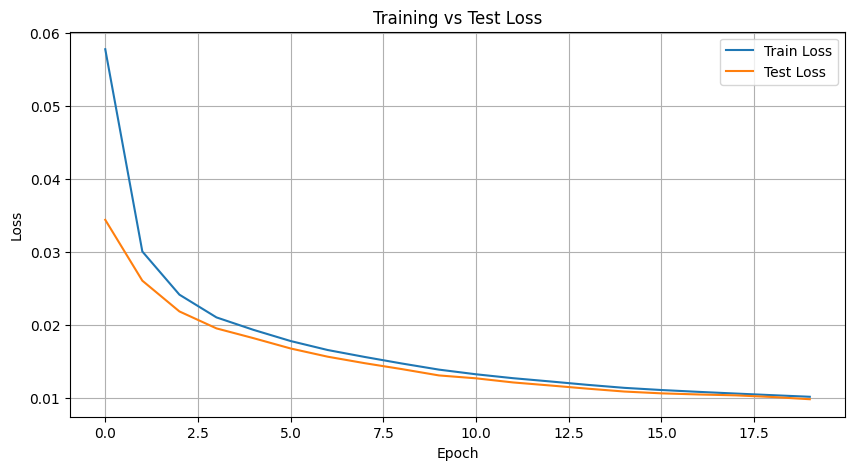

In [15]:
trainer.plot_results()

<hr>

### <h1 style="text-align: left;">Visualize Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

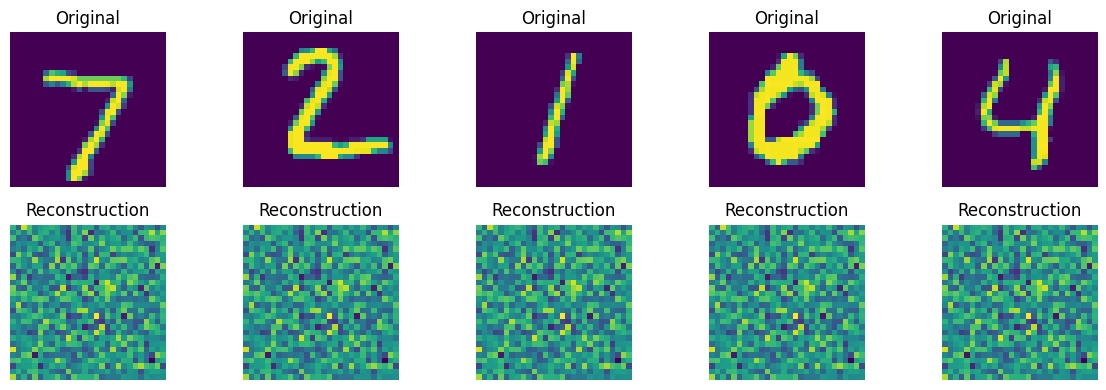

In [16]:
import matplotlib.pyplot as plt
import torch

def visualize_results(model, test_loader, device, num_images=5):
    model.eval()
    images, reconstructions = [], []

    with torch.no_grad():
        for batch in test_loader:
            imgs, _ = batch
            imgs = imgs.to(device)
            outputs = model(imgs)
            images.append(imgs.cpu())
            reconstructions.append(outputs.cpu())
            if len(images)*imgs.size(0) >= num_images:
                break

    images = torch.cat(images)[:num_images]
    reconstructions = torch.cat(reconstructions)[:num_images]

    plt.figure(figsize=(12, 4))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i+1)
        img = images[i].permute(1, 2, 0)  # Convert from CxHxW to HxWxC
        plt.imshow(img)
        plt.title("Original")
        plt.axis('off')

        # Reconstructed image
        plt.subplot(2, num_images, i + 1 + num_images)
        recon_img = reconstructions[i].permute(1, 2, 0)
        plt.imshow(recon_img)
        plt.title("Reconstruction")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_results(LAE_RECON_Model, test_loader, device='cuda' if torch.cuda.is_available() else 'cpu', num_images=5)


<hr>

### <h1 style="text-align: left;">Task 1 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 2: Convolutional Autoencoder Reconstruction | <span style="color: #9370DB;">CIFAR-10</span></b></h1>

<hr>


### <h2>1. In a Convolutional Autoencoder (CAE):</h2>

<ul>
    <li>The <b>encoder</b> primarily uses <code>Conv2d</code> and <code>MaxPool2d</code> layers for feature extraction and dimensionality reduction.</li>
    <li>The <b>decoder</b> utilizes <code>ConvTranspose2d</code> to upsample and reconstruct the original image.</li>
</ul>

<hr>

<h2>2. Convolutional Layers in a Convolutional Autoencoder</h2>

<table border="1" cellpadding="10" cellspacing="0" width="100%">
    <tr style="background-color:rgb(60, 60, 60);">
        <th style="text-align: left;">Layer</th>
        <th style="text-align: left;">Function</th>
    </tr>
    <tr>
        <td><b>Conv2d</b></td>
        <td>Extracts spatial features from the input image by applying filters.</td>
    </tr>
    <tr>
        <td><b>MaxPool2d</b></td>
        <td>Downsamples feature maps to reduce spatial dimensions while preserving key information.</td>
    </tr>
    <tr>
        <td><b>ConvTranspose2d</b></td>
        <td>Upsamples the compressed feature maps to reconstruct the original image.</td>
    </tr>
</table>

<p>You can read the PyTorch documentation aswell for more information!</p>

<hr>

<h2>3. Understanding Conv2d and ConvTranspose2d</h2>

<h3>Conv2d</h3>
<p>A <b>2D Convolutional Layer</b> applies filters (kernels) to the input image to extract spatial patterns such as edges and textures.</p>
<p><b>Syntax:</b></p>
<pre style="background-color:rgb(60, 60, 60); padding: 10px; border-radius: 5px;">
nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
</pre>

<ul>
    <li><b>in_channels:</b> Number of input channels (e.g., 3 for RGB images).</li>
    <li><b>out_channels:</b> Number of filters applied to extract features.</li>
    <li><b>kernel_size:</b> Size of the filter (e.g., 3×3).</li>
    <li><b>stride:</b> Step size for moving the filter across the image.</li>
    <li><b>padding:</b> Adds zero-padding to maintain spatial dimensions.</li>
</ul>

<h3>ConvTranspose2d</h3>
<p>The <b>ConvTranspose2d</b> layer performs the reverse operation of <b>Conv2d</b>, increasing the spatial dimensions of the feature maps.</p>
<p><b>Syntax:</b></p>
<pre style="background-color:rgb(60, 60, 60); padding: 10px; border-radius: 5px;">
nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)
</pre>

<ul>
    <li><b>in_channels:</b> Number of channels from the latent space.</li>
    <li><b>out_channels:</b> Number of filters used to reconstruct the image.</li>
    <li><b>kernel_size:</b> Size of the upsampling filter.</li>
    <li><b>stride:</b> Determines how much the feature maps expand.</li>
    <li><b>padding:</b> Adjusts spatial dimensions for accurate reconstruction.</li>
</ul>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Convolutional AutoEncoder</span></h1>

<hr>

In [17]:
import torch
import torch.nn as nn

class ConvolutionalAutoencoderRecon(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderRecon, self).__init__()

        # Encoder: Conv2d + ReLU + MaxPool2d
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),  # 3x32x32 -> 16x32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 16x32x32 -> 16x16x16

            nn.Conv2d(16, 32, 3, padding=1),  # 16x16x16 -> 32x16x16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 32x16x16 -> 32x8x8

            nn.Conv2d(32, 64, 3, padding=1),  # 32x8x8 -> 64x8x8
            nn.ReLU(),
            nn.MaxPool2d(2, 2)   # 64x8x8 -> 64x4x4
        )

        # Decoder: ConvTranspose2d + ReLU
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),  # 64x4x4 -> 32x8x8
            nn.ReLU(),

            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),  # 32x8x8 -> 16x16x16
            nn.ReLU(),

            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),   # 16x16x16 -> 3x32x32
            nn.Sigmoid()  # output pixel values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">CAERecon</span></h1>

<hr>

### <p><strong>Overview:</strong><br>
The <code>CAERecon</code> is a class designed to facilitate the training, evaluation, and visualization of a <strong>Convolutional Autoencoder (CAE)</strong> model. It handles the training loop, computes losses, performs model evaluations after each epoch, and enables visualization of reconstructions to monitor model progress. The class also provides methods to save and load the model at any point.</p>

---

<h3>Constructor (<code>__init__</code>):</h3>
<p>The constructor initializes key components for training, evaluation, and visualization:</p>
<ul>
  <li><code>model (nn.Module)</code>: The Autoencoder model to be trained.</li>
  <li><code>train_loader (DataLoader)</code>: The training dataset loader.</li>
  <li><code>test_loader (DataLoader)</code>: The test dataset loader.</li>
  <li><code>lr (float)</code>: Learning rate for the optimizer (default is <code>0.001</code>).</li>
  <li><code>num_epochs (int)</code>: Number of epochs for training (default is <code>20</code>).</li>
  <li><code>device (str or None)</code>: Specifies the device for computation (e.g., 'cuda', 'mps', 'cpu'). It auto-detects if set to <code>None</code>.</li>
  <li><code>imshow_func (function or None)</code>: An optional function for visualizing images (reconstructed outputs from the model). This allows for custom image visualization logic, if needed.</li>
</ul>
<p>The constructor sets up the model, loss function (<code>MSELoss</code>), optimizer (<code>Adam</code>), and prepares lists for storing training and test losses. It also prints a summary of the model.</p>

---

<h3>Methods:</h3>

<h4>1. Training (<code>train</code>)</h4>
<p><strong>Purpose:</strong> Trains the autoencoder model over a specified number of epochs.</p>
<p><strong>Workflow:</strong> Iterates over training data, performing a forward pass, calculating loss, and updating model weights using backpropagation. After every epoch, the method prints the training loss and calls the <code>evaluate</code> method to assess the model on the test dataset.</p>
<p><strong>Outputs:</strong> Prints the average training loss at the end of each epoch.</p>

<h4>2. Evaluation (<code>evaluate</code>)</h4>
<p><strong>Purpose:</strong> Evaluates the trained model's performance on the test dataset after each epoch.</p>
<p><strong>Workflow:</strong> The model is set to evaluation mode (<code>eval</code>), and predictions are made on the test set. The <strong>test loss</strong> is computed by comparing the model's outputs with the ground truth.</p>
<p><strong>Outputs:</strong> Prints the test loss for the current epoch.</p>

<h4>3. Model Saving (<code>save_model</code>)</h4>
<p><strong>Purpose:</strong> Saves the trained model to a file.</p>
<p><strong>Path:</strong> The model is saved to the provided path (default is <code>/models/cae_model.pth</code>).</p>
<p><strong>Outputs:</strong> Prints a message confirming the model has been saved to the specified path.</p>

<h4>4. Model Loading (<code>load_model</code>)</h4>
<p><strong>Purpose:</strong> Loads a pre-trained model from a file.</p>
<p><strong>Path:</strong> Loads the model from the specified path (default is <code>/models/cae_model.pth</code>).</p>
<p><strong>Outputs:</strong> Prints a message confirming the model has been loaded from the specified path.</p>

<h4>5. Plotting Results (<code>plot_results</code>)</h4>
<p><strong>Purpose:</strong> Plots the training and test losses over the course of training.</p>
<p><strong>Workflow:</strong> After training, this method visualizes the losses for both training and test sets over all epochs.</p>
<p><strong>Outputs:</strong> Displays a plot with two lines: one for <strong>training loss</strong> and one for <strong>test loss</strong>, enabling a comparison of performance.</p>

<h4>6. Visualization of Reconstructions (<code>visualize_reconstructions</code>)</h4>
<p><strong>Purpose:</strong> Visualizes the <strong>original images</strong> alongside their <strong>reconstructed outputs</strong> from the trained model.</p>
<p><strong>Workflow:</strong> The model is set to evaluation mode (<code>eval</code>). A batch of test images is passed through the model to obtain reconstructions. A few images (specified by <code>num_images</code>) are displayed, where the first image in each pair is the ground truth and the second is the reconstruction.</p>
<p><strong>Outputs:</strong> Displays side-by-side visualizations of original and reconstructed images for comparison.</p>

---

<h3>Example Usage:</h3>

```python
# Instantiate the CAERecon class
trainer = CAERecon(model, train_loader, test_loader, lr=0.001, num_epochs=20, device='cuda')

# Start training
trainer.train()

# After training, plot the training and test losses
trainer.plot_results()

# Visualize the reconstructions from the test set
trainer.visualize_reconstructions(num_images=5)
```

---

<h3>Summary:</h3>
<p>The <code>CAERecon</code> class provides an end-to-end solution for training a <strong>Convolutional Autoencoder (CAE)</strong> model. It includes methods for:</p>
<ul>
  <li>Training and loss calculation</li>
  <li>Periodic evaluation and printing of test losses</li>
  <li>Visualizing reconstructed images alongside ground truth</li>
  <li>Saving and loading model weights</li>
</ul>
<p>This structure helps you monitor the model's progress at each epoch, assess performance, and visualize the model's reconstructions in a streamlined manner.</p>

---

<h3>Notes:</h3>
<ul>
  <li>The class is designed to be flexible and can accept a custom image visualization function (<code>imshow_func</code>) for visualizing the model's reconstructions.</li>
  <li>Loss values are tracked during training and evaluation for both training and test sets, enabling meaningful analysis of model performance over time.</li>
</ul>

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class CAERecon:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Convolutional Autoencoder Trainer.
        """
        self.name = "Convolutional Autoencoder (Reconstruction)"
        self.model = model

        # Auto device selection
        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = torch.device(device)

        self.model.to(self.device)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.imshow_func = imshow_func

        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        self.train_losses = []
        self.test_losses = []

        print(f"Initialized {self.name} on device: {self.device}")
        print(self.model)

    def train(self):
        """
        Trains the Autoencoder for a specified number of epochs.
        """
        for epoch in range(1, self.num_epochs + 1):
            self.model.train()
            running_loss = 0.0

            for images, _ in self.train_loader:
                images = images.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, images)
                loss.backward()
                self.optimizer.step()

                running_loss += loss.item() * images.size(0)

            avg_train_loss = running_loss / len(self.train_loader.dataset)
            self.train_losses.append(avg_train_loss)
            print(f"Epoch [{epoch}/{self.num_epochs}] Training Loss: {avg_train_loss:.6f}")

            self.evaluate(epoch)

    def evaluate(self, epoch, train=False):
        """
        Evaluates the Autoencoder model on the test dataset after each epoch.

        Args:
            epoch (int): Current training epoch.
            train (bool): If True, evaluate on training set, else test set.
        """
        self.model.eval()
        running_loss = 0.0

        data_loader = self.train_loader if train else self.test_loader

        with torch.no_grad():
            for images, _ in data_loader:
                images = images.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, images)
                running_loss += loss.item() * images.size(0)

        avg_loss = running_loss / len(data_loader.dataset)
        if train:
            print(f"Epoch [{epoch}] Train Loss: {avg_loss:.6f}")
        else:
            self.test_losses.append(avg_loss)
            print(f"Epoch [{epoch}] Test Loss: {avg_loss:.6f}")

    def save_model(self, path="/models/CAE_RECON.pth"):
        """
        Saves the trained model to a specified file path.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/CAE_RECON.pth"):
        """
        Loads the trained model from a saved file.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """
        Plots the training and test loss over epochs.
        """
        plt.figure(figsize=(8,5))
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses, label='Train Loss')
        plt.plot(range(1, len(self.test_losses) + 1), self.test_losses, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Test Loss over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_reconstructions(self, num_images=5):
        """
        Visualizes the original and reconstructed images.
        """
        self.model.eval()
        images, _ = next(iter(self.test_loader))
        images = images.to(self.device)

        with torch.no_grad():
            outputs = self.model(images)

        images = images.cpu()
        outputs = outputs.cpu()

        num_images = min(num_images, images.size(0))

        fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))

        for i in range(num_images):
            # Original images
            ax = axes[0, i]
            if self.imshow_func:
                self.imshow_func(images[i], ax=ax)
            else:
                img = images[i].permute(1, 2, 0)
                ax.imshow(img)
            ax.set_title("Original")
            ax.axis('off')

            # Reconstructed images
            ax = axes[1, i]
            if self.imshow_func:
                self.imshow_func(outputs[i], ax=ax)
            else:
                img = outputs[i].permute(1, 2, 0)
                ax.imshow(img)
            ax.set_title("Reconstruction")
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    def create_dataset(self):
        """
        Creates a dataset of reconstructed images for further analysis or classification.

        Returns:
            DataLoader: A DataLoader containing reconstructed images and labels.
        """
        self.model.eval()
        reconstructed = []
        labels = []

        with torch.no_grad():
            for images, lbls in self.train_loader:
                images = images.to(self.device)
                outputs = self.model(images)
                reconstructed.append(outputs.cpu())
                labels.append(lbls)

        reconstructed = torch.cat(reconstructed)
        labels = torch.cat(labels)

        from torch.utils.data import TensorDataset, DataLoader
        dataset = TensorDataset(reconstructed, labels)
        return DataLoader(dataset, batch_size=self.train_loader.batch_size, shuffle=False)


<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CAE</span></h1>

### training and visulization

<hr>

100%|██████████| 170M/170M [00:03<00:00, 47.6MB/s]


Initialized Convolutional Autoencoder (Reconstruction) on device: cuda
ConvolutionalAutoencoderRecon(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)
Epoch [1/20] Training Loss: 0.025735
Epoch [1] Test Loss: 0.

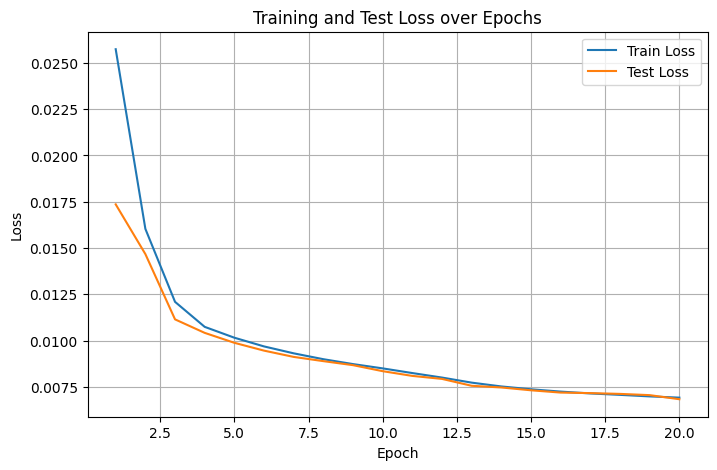

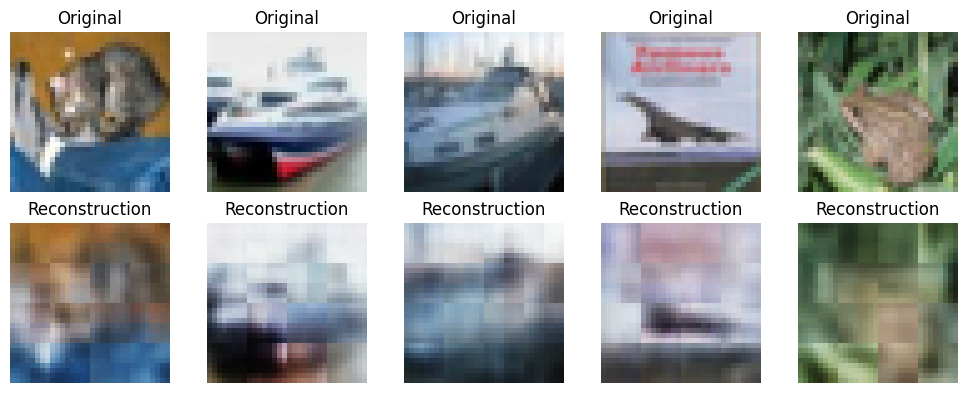

RuntimeError: Parent directory /models does not exist.

In [20]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Instantiate your model (e.g., the one from earlier)
model = ConvolutionalAutoencoderRecon()

# Create your train_loader and test_loader for CIFAR-10 dataset

trainer = CAERecon(model, train_loader, test_loader, lr=0.001, num_epochs=20, device='cuda')

# Train the model
trainer.train()

# Plot training and test loss curves
trainer.plot_results()

# Visualize reconstructed images
trainer.visualize_reconstructions(num_images=5)

# Save model
trainer.save_model()

# Load model (when needed)
trainer.load_model()


In [37]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class LAEDenoise:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Linear Autoencoder Trainer for Denoising.
        """
        self.name = "Linear Autoencoder (Denoising)"

        # Device setup
        if device is None:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        else:
            self.device = torch.device(device)

        self.model = model.to(self.device)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.imshow_func = imshow_func

        # Loss function and optimizer
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        # Loss history
        self.train_losses = []
        self.test_losses = []

        print(f"Initialized {self.name} on device: {self.device}")
        print(self.model)

    def train(self):
      self.model.train()
      for epoch in range(1, self.num_epochs + 1):
          running_loss = 0.0
          for noisy_imgs, clean_imgs in self.train_loader:
              noisy_imgs = noisy_imgs.to(self.device)
              clean_imgs = clean_imgs.to(self.device)

              self.optimizer.zero_grad()
              outputs = self.model(noisy_imgs)
              loss = self.criterion(outputs, clean_imgs)
              loss.backward()
              self.optimizer.step()

              running_loss += loss.item() * noisy_imgs.size(0)  # sum loss over all samples in batch

          avg_train_loss = running_loss / len(self.train_loader.dataset)  # average loss per sample
          self.train_losses.append(avg_train_loss)

          print(f"Epoch [{epoch}/{self.num_epochs}] - Train Loss: {avg_train_loss:.6f}")

          # Evaluate after each epoch on test set
          self.evaluate(epoch, train=False)


    def evaluate(self, epoch, train=True):
      self.model.eval()
      total_loss = 0.0
      data_loader = self.train_loader if train else self.test_loader

      with torch.no_grad():
          for noisy_imgs, clean_imgs in data_loader:
              noisy_imgs = noisy_imgs.to(self.device)
              clean_imgs = clean_imgs.to(self.device)
              outputs = self.model(noisy_imgs)
              loss = self.criterion(outputs, clean_imgs)
              total_loss += loss.item() * noisy_imgs.size(0)  # sum loss over samples

      avg_loss = total_loss / len(data_loader.dataset)

      if train:
          # Don't append again here, already appended in train()
          print(f"Epoch [{epoch}] - Train Eval Loss: {avg_loss:.6f}")
      else:
          self.test_losses.append(avg_loss)
          print(f"Epoch [{epoch}] - Test Loss: {avg_loss:.6f}")

      def save_model(self, path="/models/LAE_DENOISE.pth"):
          torch.save(self.model.state_dict(), path)
          print(f"Model saved to: {path}")

    def load_model(self, path="/models/LAE_DENOISE.pth"):
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """
        Plots the training and test loss over epochs.
        """
        plt.figure(figsize=(8,6))
        plt.plot(range(1, len(self.train_losses)+1), self.train_losses, label='Train Loss')
        plt.plot(range(1, len(self.test_losses)+1), self.test_losses, label='Test Loss')
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.title(f"{self.name} Loss over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_denoising(self, num_images=5):
        """
        Visualizes the original noisy images and the denoised reconstructions.
        """
        self.model.eval()
        noisy_batch, clean_batch = next(iter(self.test_loader))
        noisy_batch = noisy_batch.to(self.device)
        clean_batch = clean_batch.to(self.device)
        with torch.no_grad():
            outputs = self.model(noisy_batch)

        # Use CPU for visualization
        noisy_imgs = noisy_batch.cpu()
        clean_imgs = clean_batch.cpu()
        outputs = outputs.cpu()

        num_images = min(num_images, noisy_imgs.size(0))
        fig, axes = plt.subplots(num_images, 3, figsize=(10, 4*num_images))

        for i in range(num_images):
            # Original Noisy
            axes[i,0].imshow(noisy_imgs[i].permute(1,2,0))
            axes[i,0].set_title("Noisy Input")
            axes[i,0].axis('off')

            # Denoised Output
            axes[i,1].imshow(outputs[i].permute(1,2,0))
            axes[i,1].set_title("Denoised Output")
            axes[i,1].axis('off')

            # Clean Ground Truth
            axes[i,2].imshow(clean_imgs[i].permute(1,2,0))
            axes[i,2].set_title("Clean Image")
            axes[i,2].axis('off')

        plt.tight_layout()
        plt.show()

    def create_dataset(self):
        """
        Creates a dataset of reconstructed images for further analysis or classification.
        Returns a DataLoader containing reconstructed images and labels.
        """
        self.model.eval()
        recon_images = []
        labels = []
        with torch.no_grad():
            for noisy_imgs, clean_imgs in self.test_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                outputs = self.model(noisy_imgs)
                recon_images.append(outputs.cpu())
                labels.append(clean_imgs.cpu())  # Or keep track of labels if you have them

        # Stack all images and labels
        recon_images = torch.cat(recon_images, dim=0)
        labels = torch.cat(labels, dim=0)

        # Create a TensorDataset and DataLoader
        from torch.utils.data import TensorDataset, DataLoader
        dataset = TensorDataset(recon_images, labels)
        loader = DataLoader(dataset, batch_size=64, shuffle=False)
        return loader


<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [38]:
import torch.nn as nn

class LinearAutoencoder(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=128):
        super(LinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # assuming input normalized between 0 and 1
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(x.size(0), 1, 28, 28)  # reshape back to image shape (e.g. 28x28 grayscale)
        return decoded

# Initialize the Linear Autoencoder Model
LAE_DENOISE_Model = LinearAutoencoder(input_dim=28*28, hidden_dim=128)

# Initialize the trainer
LAE_DENOISE_Trainer = LAEDenoise(
    model=LAE_DENOISE_Model,
    train_loader=train_loader,
    test_loader=test_loader,
    lr=0.001,
    num_epochs=20,
    device='cuda'  # or 'cpu'
)

Initialized Linear Autoencoder (Denoising) on device: cuda
LinearAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">LAE</span></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [39]:
def plot_results(self):
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(self.train_losses) + 1), self.train_losses, label='Train Loss')
    plt.plot(range(1, len(self.test_losses) + 1), self.test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


<hr>

## <h1 style="text-align: left;"><b>Task 4: Convolutional Autoencoder Denoising | <span style="color: #9370DB;">MNIST</span></b></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Convolutional AutoEncoder</span></h1>

<hr>

In [41]:
import torch
import torch.nn as nn

class ConvolutionalAutoencoderDenoise(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderDenoise, self).__init__()

        # Encoder: Conv layers + ReLU + MaxPool to reduce spatial dims
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # [B,16,28,28]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # [B,16,14,14]

            nn.Conv2d(16, 32, kernel_size=3, padding=1), # [B,32,14,14]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                          # [B,32,7,7]

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # [B,64,7,7]
            nn.ReLU(),
            nn.MaxPool2d(2, 2)                           # [B,64,3,3]
        )

        # Decoder: ConvTranspose layers to upsample back to input size
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),  # [B,32,6,6]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),  # [B,16,12,12]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1), # [B,1,28,28]
            nn.Sigmoid()  # for output pixel values between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">CAEDenoise</span></h1>

<hr>

In [ ]:
class CAEDenoise:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Convolutional Autoencoder Trainer for Denoising.

        Args:
            model (nn.Module): The Autoencoder model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'mps' or 'cuda' or 'cpu', auto-detect if None.
            imshow_func (function or None): Function to visualize images (denoised reconstructions).
        """
        self.name = "Convolutional Autoencoder (Denoising)"
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def train(self):
        """
        Trains the Autoencoder for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def evaluate(self, epoch, train=True):
        """
        Evaluates the Autoencoder model on the test dataset after each epoch.

        Args:
            epoch (int): Current training epoch.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def save_model(self, path="/models/CAE_DENOISE.pth"):
        """
        Saves the trained model to a specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/CAE_DENOISE.pth"):
        """
        Loads the trained model from a saved file.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """
        Plots the training and test loss over epochs.
        """
        # ===================== YOUR CODE HERE =====================

        # ===========================================================
        raise NotImplementedError

    def visualize_denoising(self, num_images=5):
        """
        Visualizes the original and denoised images.

        Args:
            num_images (int): Number of images to display.
        """
        # ===================== YOUR CODE HERE =====================

        # ===========================================================
        raise NotImplementedError

    def create_dataset(self):
        """
        Creates a dataset of reconstructed images for further analysis or classification.

        Returns:
            DataLoader: A DataLoader containing reconstructed images and labels.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [45]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    # maybe other transforms here
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)


In [46]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # ensures single channel input
    transforms.ToTensor(),
    # add any other transforms if needed (normalization, etc.)
])


In [49]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

class CAEDenoise:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        self.name = "Convolutional Autoencoder (Denoising)"

        # Device setup
        if device is None:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        else:
            self.device = torch.device(device)

        self.model = model.to(self.device)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.imshow_func = imshow_func

        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        self.train_losses = []
        self.test_losses = []

        print(f"Initialized {self.name} on device: {self.device}")
        print(self.model)

    def train(self):
        self.model.train()
        for epoch in range(1, self.num_epochs + 1):
            running_loss = 0.0
            for noisy_imgs, clean_imgs in self.train_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                clean_imgs = clean_imgs.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(noisy_imgs)
                loss = self.criterion(outputs, clean_imgs)
                loss.backward()
                self.optimizer.step()

                running_loss += loss.item() * noisy_imgs.size(0)

            epoch_loss = running_loss / len(self.train_loader.dataset)
            self.train_losses.append(epoch_loss)

            print(f"Epoch [{epoch}/{self.num_epochs}] Train Loss: {epoch_loss:.6f}")

            # Evaluate after each epoch
            self.evaluate(epoch, train=False)

    def evaluate(self, epoch, train=True):
        self.model.eval()
        total_loss = 0.0
        with torch.no_grad():
            data_loader = self.train_loader if train else self.test_loader
            for noisy_imgs, clean_imgs in data_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                clean_imgs = clean_imgs.to(self.device)
                outputs = self.model(noisy_imgs)
                loss = self.criterion(outputs, clean_imgs)
                total_loss += loss.item() * noisy_imgs.size(0)

        avg_loss = total_loss / len(data_loader.dataset)
        if train:
            print(f"Epoch [{epoch}] Train Loss: {avg_loss:.6f}")
            self.train_losses.append(avg_loss)
        else:
            print(f"Epoch [{epoch}] Test Loss: {avg_loss:.6f}")
            self.test_losses.append(avg_loss)

    def save_model(self, path="/models/CAE_DENOISE.pth"):
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/CAE_DENOISE.pth"):
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        plt.figure(figsize=(8,6))
        plt.plot(range(1, len(self.train_losses)+1), self.train_losses, label='Train Loss')
        plt.plot(range(1, len(self.test_losses)+1), self.test_losses, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.title(f'{self.name} Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_denoising(self, num_images=5):
        self.model.eval()
        noisy_imgs, clean_imgs = next(iter(self.test_loader))
        noisy_imgs = noisy_imgs.to(self.device)
        clean_imgs = clean_imgs.to(self.device)

        with torch.no_grad():
            outputs = self.model(noisy_imgs)

        noisy_imgs = noisy_imgs.cpu()
        clean_imgs = clean_imgs.cpu()
        outputs = outputs.cpu()

        num_images = min(num_images, noisy_imgs.size(0))
        fig, axes = plt.subplots(num_images, 3, figsize=(10, 4 * num_images))

        for i in range(num_images):
            axes[i,0].imshow(noisy_imgs[i].squeeze(), cmap='gray')
            axes[i,0].set_title('Noisy Input')
            axes[i,0].axis('off')

            axes[i,1].imshow(outputs[i].squeeze(), cmap='gray')
            axes[i,1].set_title('Denoised Output')
            axes[i,1].axis('off')

            axes[i,2].imshow(clean_imgs[i].squeeze(), cmap='gray')
            axes[i,2].set_title('Clean Image')
            axes[i,2].axis('off')

        plt.tight_layout()
        plt.show()

    def create_dataset(self):
        self.model.eval()
        recon_images = []
        labels = []

        with torch.no_grad():
            for noisy_imgs, clean_imgs in self.test_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                outputs = self.model(noisy_imgs)
                recon_images.append(outputs.cpu())
                labels.append(clean_imgs.cpu())

        recon_images = torch.cat(recon_images, dim=0)
        labels = torch.cat(labels, dim=0)

        dataset = TensorDataset(recon_images, labels)
        loader = DataLoader(dataset, batch_size=64, shuffle=False)
        return loader


# Usage example placeholder

In [50]:
import torch.nn as nn

class ConvolutionalAutoencoderDenoise(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderDenoise, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=1, padding=1),  # 28x28 -> 28x28
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                       # 28x28 -> 14x14
            nn.Conv2d(16, 32, 3, stride=1, padding=1), # 14x14 -> 14x14
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                       # 14x14 -> 7x7
            nn.Conv2d(32, 64, 3, stride=1, padding=1), # 7x7 -> 7x7
            nn.ReLU(),
            nn.MaxPool2d(2, 2)                        # 7x7 -> 3x3 (floor division)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 2, stride=2),  # 3x3 -> 6x6
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 2, stride=2),  # 6x6 -> 12x12
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # 12x12 -> 28x28
            nn.Sigmoid()  # output between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [51]:
CAE_DENOISE_Model = ConvolutionalAutoencoderDenoise()
CAE_DENOISE_Trainer = CAEDenoise(CAE_DENOISE_Model, train_loader, test_loader, lr=0.001, num_epochs=20)


Initialized Convolutional Autoencoder (Denoising) on device: cuda
ConvolutionalAutoencoderDenoise(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)


<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CAE</span></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Visualize Results | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

Overall_Results["Task 4"] = {
    "Train Loss (Last Epoch)": None,
    "Test Loss (Last Epoch)": None,
    "Train Loss (Minimum)": None,
    "Test Loss (Minimum)": None,
}

<hr>

### <h1 style="text-align: left;">Task 4 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 5: Image Classification (Reconstruction) | <span style="color: #9370DB;">CIFAR</span></b></h1>

<hr>

### <h2>1. CIFAR-10 Data Preparation:</h2>

<ul>
    <li><b>Original Data:</b> Use the original CIFAR-10 dataset.</li>
    <li><b>LAE Recon Data:</b> Feed the CIFAR-10 images through the LAE model to obtain the reconstructed images.</li>
    <li><b>CAE Recon Data:</b> Feed the CIFAR-10 images through the CAE model to obtain the reconstructed images.</li>
</ul>

<hr>

<h2>2. Classification Model:</h2>

<p>The task requires training a classifier on the following datasets:</p>
<ul>
    <li><b>Original CIFAR-10:</b> Directly train a classifier on the original CIFAR-10 dataset.</li>
</ul>

<hr>

<h2>3. Evaluation Metrics:</h2>

<p>The following metrics should be used to evaluate and compare the performance of the classifier on each test dataset:</p>

<ul>
    <li><b>Accuracy:</b> Percentage of correct classifications.</li>
    <li><b>Precision:</b> The proportion of positive identifications that were actually correct.</li>
    <li><b>Recall:</b> The proportion of actual positives that were correctly identified.</li>
    <li><b>F1-Score:</b> The harmonic mean of precision and recall, providing a balance between them.</li>
</ul>

<hr>

<h2>4. Comparison:</h2>

<p>For comparison:</p>

<ul>
    <li><b>Accuracy Comparison:</b> Compare the classification accuracy for the original data, LAE recon, and CAE recon.</li>
    <li><b>Confusion Matrices:</b> Plot confusion matrices for each classifier to visualize how the model performs across the different classes.</li>
</ul>

<hr>

<h2>5. Analysis:</h2>

<ul>
    <li><b>Feature Retention:</b> Analyze how well the LAE and CAE models preserve features of the original data during reconstruction.</li>
    <li><b>Impact of Reconstruction:</b> Determine the impact of reconstruction on classification accuracy and model performance.</li>
    <li><b>Best Reconstruction Model:</b> Conclude which reconstruction model (LAE or CAE) preserves the original data's classification features better.</li>
</ul>

<hr>

<h2>6. Visualization:</h2>

<ul>
    <li><b>Plot Metrics:</b> Plot the evaluation metrics (accuracy, precision, recall, F1-score) for each dataset to visualize performance differences.</li>
</ul>

In [ ]:
# ================== Create Datasets ==================
LAERecon_dataloader = ...
CAERecon_dataloader = ...

<hr>

### <h1 style="text-align: left;"> Class | <span style="color: #9370DB;">Convolutional Neural Network Recon</span></h1>

<hr>

In [ ]:
class CNNRecon(nn.Module):
    def __init__(self):
        super(CNNRecon, self).__init__()
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def forward(self, x):
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

<hr>

### <h1 style="text-align: left;"> Class | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [ ]:
class CNNClassifierRecon:
    def __init__(self, model, train_loader, test_loader, LAERecon_loader, CAERecon_loader, lr=0.001, num_epochs=20, device=None):
        """
        Initializes the CNN classifier for original and reconstructed datasets.

        Args:
            model (nn.Module): The CNN model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            LAERecon_loader (DataLoader): DataLoader for LAE reconstructed images.
            CAERecon_loader (DataLoader): DataLoader for CAE reconstructed images.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'cuda' or 'cpu', auto-detect if None.
        """
        self.name = "CNN Classifier Reconstruction"
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def train(self):
        """
        Trains the CNN classifier for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def evaluate(self, dataloader, print_results=True, epoch=None):
        """
        Evaluates the CNN model on a given dataset.

        Args:
            dataloader (DataLoader): The dataset loader to evaluate on.
            print_results (bool): Whether to print evaluation metrics.
            epoch (int or None): Current epoch number if evaluating during training.

        Returns:
            dict: Contains loss, accuracy, precision, recall, f1-score, and confusion matrix.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def save_model(self, path="CNN_RECON.pth"):
        """
        Saves the trained model to the specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")

    def load_model(self, path="CNN_RECON.pth"):
        """
        Loads the trained model from the specified file path.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [ ]:
CNN_RECON_Model = ...
CNN_CLASSIFIER_RECON_Trainer = ...

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Results | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

Overall_Results["Task 5"] = {
    "Train Loss (Last Epoch)": None,
    "Test Loss (Last Epoch)": None,
    "Train Accuracy (Last Epoch)": None,
    "Test Accuracy (Last Epoch)": None,
    "Train Loss (Minimum)": None,
    "Test Loss (Minimum)": None,
    "Train Accuracy (Maximum)": None,
    "Test Accuracy (Maximum)": None,
}

<hr>

### <h1 style="text-align: left;">Analysis | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

**Answer here:**

<hr>

<hr>

### <h1 style="text-align: left;">Task 5 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 6: Image Classification (Denoising) | <span style="color: #9370DB;">MNIST</span></b></h1>

<hr>

### <h2>1. MNIST Data Preparation:</h2>

<ul>
    <li><b>Original Data:</b> Use the original MNIST dataset.</li>
    <li><b>LAE Denoised Data:</b> Pass the noisy MNIST images through the LAE model to obtain the denoised images.</li>
    <li><b>CAE Denoised Data:</b> Pass the noisy MNIST images through the CAE model to obtain the denoised images.</li>
</ul>

<hr>

<h2>2. Classification Model:</h2>

<p>The task requires training a classifier on the following datasets:</p>
<ul>
    <li><b>Original MNIST:</b> Train a classifier on the original MNIST dataset.</li>
</ul>

<hr>

<h2>3. Evaluation Metrics:</h2>

<p>The following metrics should be used to evaluate and compare the performance of the classifier on each test dataset:</p>

<ul>
    <li><b>Accuracy:</b> Percentage of correct classifications.</li>
    <li><b>Precision:</b> The proportion of positive identifications that were actually correct.</li>
    <li><b>Recall:</b> The proportion of actual positives that were correctly identified.</li>
    <li><b>F1-Score:</b> The harmonic mean of precision and recall, providing a balance between them.</li>
</ul>

<hr>

<h2>4. Comparison:</h2>

<p>For comparison:</p>

<ul>
    <li><b>Accuracy Comparison:</b> Compare the classification accuracy for the original data, LAE denoised, and CAE denoised images.</li>
    <li><b>Confusion Matrices:</b> Plot confusion matrices for each classifier to visualize how the model performs across different classes.</li>
</ul>

<hr>

<h2>5. Analysis:</h2>

<ul>
    <li><b>Noise Reduction Effectiveness:</b> Analyze how well the LAE and CAE models remove noise while retaining key features.</li>
    <li><b>Impact of Denoising:</b> Determine the impact of denoising on classification accuracy and model performance.</li>
    <li><b>Best Denoising Model:</b> Conclude which denoising model (LAE or CAE) preserves the original data's classification features better.</li>
</ul>

<hr>

<h2>6. Visualization:</h2>

<ul>
    <li><b>Plot Metrics:</b> Plot the evaluation metrics (accuracy, precision, recall, F1-score) for each dataset to visualize performance differences.</li>
</ul>


In [ ]:
# ================== Create Datasets ==================
LAEDenoise_dataloader = ...
CAEDenoise_dataloader = ...

<hr>

### <h1 style="text-align: left;"> Class | <span style="color: #9370DB;">Convolutional Neural Network Denoising</span></h1>

<hr>

In [ ]:
class CNNDenoise(nn.Module):
    def __init__(self):
        super(CNNDenoise, self).__init__()
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def forward(self, x):
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [ ]:
class CNNClassifierDenoise:
    def __init__(self, model, train_loader, test_loader, LAEDenoise_loader, CAEDenoise_loader, lr=0.001, num_epochs=20, device=None):
        """
        Initializes the CNN classifier for original and denoised datasets.

        Args:
            model (nn.Module): The CNN model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            LAEDenoise_loader (DataLoader): DataLoader for LAE denoised images.
            CAEDenoise_loader (DataLoader): DataLoader for CAE denoised images.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'cuda' or 'cpu', auto-detect if None.
        """
        self.name = "CNN Classifier Denoising"
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def train(self):
        """
        Trains the CNN classifier for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def evaluate(self, dataloader, print_results=True, epoch=None):
        """
        Evaluates the CNN model on a given dataset.

        Args:
            dataloader (DataLoader): The dataset loader to evaluate on.
            print_results (bool): Whether to print evaluation metrics.
            epoch (int or None): Current epoch number if evaluating during training.

        Returns:
            dict: Contains loss, accuracy, precision, recall, f1-score, and confusion matrix.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def save_model(self, path="CNN_Denoise.pth"):
        """
        Saves the trained model to the specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")

    def load_model(self, path="CNN_Denoise.pth"):
        """
        Loads the trained model from the specified file path.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [ ]:
CNN_DENOISE_Model = ...
CNN_CLASSIFIER_DENOISE_Trainer = ...

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Results | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

Overall_Results["Task 6"] = {
    "Train Loss (Last Epoch)": None,
    "Test Loss (Last Epoch)": None,
    "Train Accuracy (Last Epoch)": None,
    "Test Accuracy (Last Epoch)": None,
    "Train Loss (Minimum)": None,
    "Test Loss (Minimum)": None,
    "Train Accuracy (Maximum)": None,
    "Test Accuracy (Maximum)": None,
}

<hr>

### <h1 style="text-align: left;">Analysis | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

**Answer here:**

<hr>

<hr>

### <h1 style="text-align: left;">Task 6 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 7: Classification using Latent Space | <span style="color: #9370DB;">CIFAR-10</span></b></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Convolutional AutoEncoder</span></h1>

<hr>

In [ ]:
class ConvolutionalAutoencoderLatentSpace(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderLatentSpace, self).__init__()
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def forward(self, x):
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Trainer + Interpolation</span></h1>

<hr>

### <h2>Interpolation in Latent Space</h2>

<p>Interpolation in an autoencoder's latent space involves generating intermediate representations between two encoded data points.
In the <code>AutoencoderTrainer</code> class, this is implemented through two methods:</p>

<ul>
    <li><b><code>interpolate_same_class</code></b>: Performs interpolation between two samples of the same class.</li>
    <li><b><code>interpolate_different_classes</code></b>: Interpolates between two samples belonging to different classes.</li>
</ul>

<hr>

<h2>Why Do We Perform Interpolation?</h2>

<ul>
    <li>
        <b>Understanding the Learned Latent Space</b>
        <ul>
            <li>By interpolating between encoded representations, we can analyze how the model organizes and encodes data.</li>
            <li>A well-trained autoencoder should produce smooth transitions between interpolated samples.</li>
        </ul>
    </li>
    <li>
        <b>Semantic Meaning of Latent Representations</b>
        <ul>
            <li>If interpolation results in meaningful intermediate samples, it suggests that the latent space is structured logically.</li>
            <li>For same-class interpolation, a gradual shift should preserve key features of the class.</li>
            <li>For different-class interpolation, the transition should indicate how the model bridges the gap between distinct classes.</li>
        </ul>
    </li>
    <li>
        <b>Evaluating the Decoder</b>
        <ul>
            <li>The reconstructed interpolated samples help determine whether the decoder can generalize well beyond just memorizing training samples.</li>
        </ul>
    </li>
</ul>

<hr>

<h2>How the <code>AutoencoderTrainer</code> Class Implements Interpolation</h2>

<p>In the provided implementation:</p>

<ul>
    <li>The <b>encoder</b> compresses input images into a latent representation.</li>
    <li>Two latent vectors are selected based on class labels.</li>
    <li>Intermediate points are computed using weighted combinations of the two latent vectors.</li>
    <li>The <b>decoder</b> reconstructs images from the interpolated latent representations.</li>
    <li>The function <code>visualize_interpolation</code> helps in analyzing how interpolation affects the generated samples.</li>
</ul>

<p>By running these interpolation methods, one can visually inspect whether the autoencoder has learned a meaningful latent space.</p>

In [ ]:
class AutoencoderTrainer:
    """
    A class to train an autoencoder model and perform latent space interpolations.
    This trainer supports training, latent space interpolations between
    same and different class samples, visualization, and model saving/loading.
    """

    def __init__(self, model, device="cuda" if torch.cuda.is_available() else "cpu"):
        """
        Initializes the AutoencoderTrainer.

        Args:
            model: The autoencoder model to be trained and evaluated.
            device: The device to run computations on ("cuda" or "cpu").
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def train(self, train_loader, epochs=10):
        """
        Trains the autoencoder model using mean squared error loss.

        Args:
            train_loader: DataLoader for training dataset.
            epochs: Number of training epochs (default is 10).
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def interpolate_same_class(self, dataloader, steps=10):
        """
        Performs latent space interpolation between two images of the same class.

        Args:
            dataloader: DataLoader containing the dataset.
            steps: Number of interpolation steps (default is 10).

        Returns:
            A tensor containing interpolated images if successful, else None.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def interpolate_different_classes(self, dataloader, steps=10):
        """
        Performs latent space interpolation between two images of different classes.

        Args:
            dataloader: DataLoader containing the dataset.
            steps: Number of interpolation steps (default is 10).

        Returns:
            A tensor containing interpolated images if successful, else None.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def visualize_interpolation(self, img1, img2, interpolated_images, title):
        """
        Visualizes interpolation results between two images.

        Args:
            img1: First image.
            img2: Second image.
            interpolated_images: List of interpolated images.
            title: Title for the visualization.
        """
        # ===================== YOUR CODE HERE ======================

        # ===========================================================
        raise NotImplementedError

    def save_model(self, path="/models/CAE_LATENT_SPACE.pth"):
        """
        Saves the model state to the specified file.

        Args:
            path: File path where the model will be saved.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")

    def load_model(self, path="/models/CAE_LATENT_SPACE.pth"):
        """
        Loads the model state from the specified file.

        Args:
            path: File path from where the model will be loaded.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CAE Latent Space</span></h1>

<hr>

In [ ]:
CAE_LATENT_SPACE_Model = ...
CAE_LATENT_SPACE_Trainer = ...

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CAE Latent Space</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Interpolation | <span style="color: #9370DB;">CAE Latent Space</span></h1>

<hr>

In [ ]:
# ===================== YOUR CODE HERE ======================

# ===========================================================
raise NotImplementedError

<hr>

### <h1 style="text-align: left;">Task 7 | <span style="color: #9370DB;">End</span></h1>

<hr>

In [ ]:
import json

print(json.dumps(Overall_Results, indent=4))

with open(f'{Roll_Number}_Overall_Results.json', 'w') as f:
    json.dump(Overall_Results, f, indent=4)

<hr>

### <h1 style="text-align: left;">I AM SORRY  <span style="color: #9370DB;"> : ( ( ( ( (</span></h1>

<hr>